In [1]:
# !unzip analysis_results.zip

In [2]:
import os
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.rcParams.update({'font.size': 12})

In [3]:
# Define input cases
ntrain_values = [500, 2500, 5000]
neval_values = [16, 512, 1024]
seed_values = [0, 1, 2, 3 ,4, 5, 6, 7, 8, 9]

all_data = []
for ntrain in ntrain_values:
    for neval in neval_values:
        data_points = []
        for seed in seed_values:
            # print(ntrain, neval, seed)
            resultdir = os.path.join(os.getcwd(), '..', 'analysis_results', 'ntrain='+str(ntrain)+'-neval='+str(neval)+'-seed='+str(seed))
            filepath = os.path.join(resultdir, 'output-'+'ntrain='+str(ntrain)+'-neval='+str(neval)+'-seed='+str(seed)+'.txt')
            with open(filepath, 'r') as file:
                lines = file.readlines()
                r2score = lines[-6].strip()
            data_points.append(float(r2score))
        average_r2score = np.mean(data_points)
        all_data.append((ntrain, neval, data_points, average_r2score))

# print(all_data)

# Create DataFrame
df = pd.DataFrame(all_data, columns=['ntrain', 'neval', 'R2 score', 'Average R2 score'])

display(df.head(15))
display(df.head(15)[['ntrain', 'neval', 'Average R2 score']])

,ntrain,neval,R2 score,Average R2 score
0,500,16,"[0.9718517706846782, 0.9674347847665099, 0.973...",0.971199
1,500,512,"[0.965396273237525, 0.958871732755015, 0.96457...",0.963175
2,500,1024,"[0.9631408483332586, 0.9591652270071438, 0.967...",0.963668
3,2500,16,"[0.9916001617747562, 0.9916341358809752, 0.992...",0.992097
4,2500,512,"[0.9900963589798583, 0.9899119534397484, 0.991...",0.990458
5,2500,1024,"[0.9898578213203807, 0.9898030554131668, 0.990...",0.990447
6,5000,16,"[0.9958234015316809, 0.9958056553571409, 0.995...",0.995762
7,5000,512,"[0.9952262148450436, 0.9946908130324532, 0.995...",0.995017
8,5000,1024,"[0.9947595421136417, 0.994203855489794, 0.9950...",0.994739


,ntrain,neval,Average R2 score
0,500,16,0.971199
1,500,512,0.963175
2,500,1024,0.963668
3,2500,16,0.992097
4,2500,512,0.990458
5,2500,1024,0.990447
6,5000,16,0.995762
7,5000,512,0.995017
8,5000,1024,0.994739


No. of random points at which output field is evaluated for a given input field sample during training,16,512,1024
No. of input field samples used for training,,,
500,0.971199,0.963175,0.963668
2500,0.992097,0.990458,0.990447
5000,0.995762,0.995017,0.994739


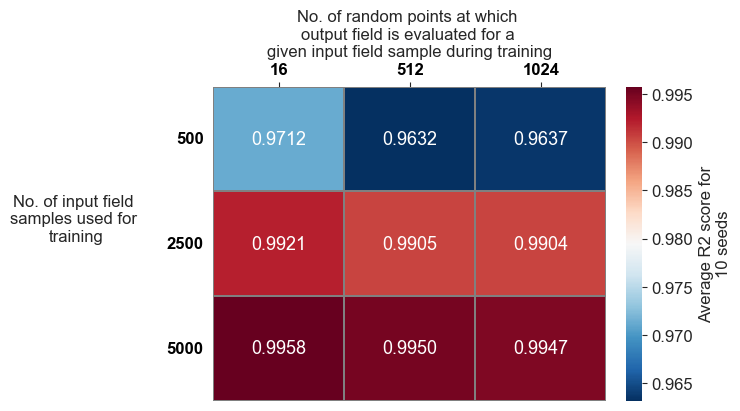

In [4]:
# Initialize a dictionary to store the results
results_table = {}

for ntrain in ntrain_values:
    # Initialize a list to store the results for this ntrain case
    results_row = []
    for neval in neval_values:
        # print(ntrain, neval)
        Average_R2score = df.loc[(df['ntrain'] == ntrain) & (df['neval'] == neval), 'Average R2 score'].values[0]
        results_row.append(float(Average_R2score))
    # Store the list of results for this ntrain case in the dictionary
    results_table[ntrain] = results_row

# Create a DataFrame from the results_table dictionary
df_results_table = pd.DataFrame.from_dict(results_table, orient='index', columns=neval_values)

# Set the index and column names
df_results_table.index.name = 'No. of input field samples used for training'
df_results_table.columns.name = 'No. of random points at which output field is evaluated for a given input field sample during training'

# Print the DataFrame
display(df_results_table)

# Set random seed for reproducibility
np.random.seed(0)

# Create the heatmap figure with some additional padding for the y-axis label
fig = plt.figure(figsize=(7, 4), facecolor='w', edgecolor='k', constrained_layout=True)
ax_heatmap = fig.add_subplot(111)

# # Set font scale
# sns.set(font_scale=1.2)

# Create the heatmap
results_array = np.array(list(results_table.values()))
ax = sns.heatmap(results_array, ax=ax_heatmap, xticklabels=neval_values, yticklabels=ntrain_values, annot=True,
                 fmt="0.4f", cmap="RdBu_r", cbar_kws={'orientation': 'vertical'},
                 annot_kws={"size": 13}, linewidths=0.1, linecolor='gray',
                 vmin=results_array.min(), vmax=results_array.max())

# Set labels and styles
ax.set_xlabel('No. of random points at which \noutput field is evaluated for a \ngiven input field sample during training', fontsize=12)  # Wrap x-axis label
ax.set_ylabel('No. of input field \nsamples used for \ntraining', fontsize=12, rotation=0, labelpad=20)  # Wrap y-axis label
ax.yaxis.set_label_coords(-0.35, 0.5)  # Adjust the position of the y-axis label
ax.xaxis.set_label_position('top')  # Move x-axis label to the top
ax.xaxis.tick_top()  # Move x-axis tick labels to the top
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, wrap=True)  # Rotate and wrap x-axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, wrap=True)  # Wrap y-axis tick labels
for label in ax.xaxis.get_ticklabels() + ax.yaxis.get_ticklabels():
    label.set_size(12)
    label.set_weight("bold")
    label.set_color("black")

# Set title at the bottom
# plt.title('Average MSE Test', fontsize=12, fontweight='bold', loc='center', y=-0.2)

# Add colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('\n'.join(textwrap.wrap('Average R2 score for 10 seeds', width=20)),fontsize=12, loc='center')

# Adjust layout and display
# plt.tight_layout()
plt.show()

# Save the figure
# plt.savefig("Average_R2score.png")

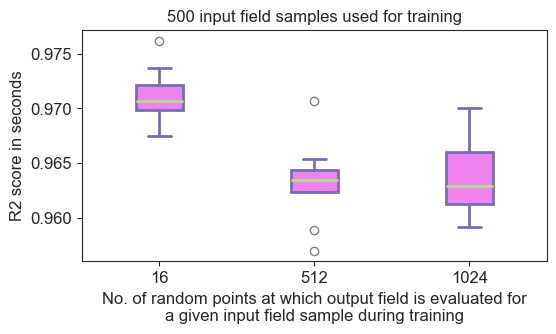

####################################################################################################


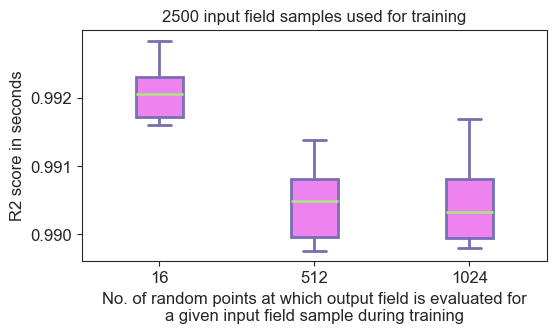

####################################################################################################


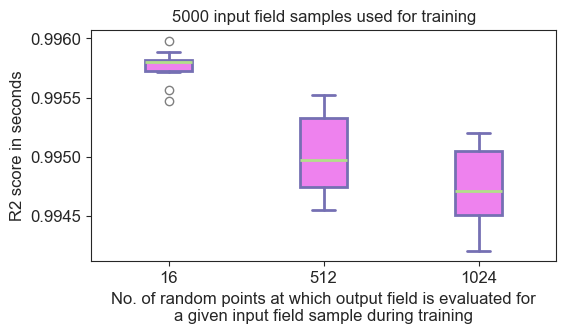

####################################################################################################


In [5]:
for ntrain in ntrain_values:
    data_to_plot = []
    for neval in neval_values:
        R2score_list = df.loc[(df['ntrain'] == ntrain) & (df['neval'] == neval), 'R2 score'].values[0]
        data_to_plot.append(R2score_list)
    # print(data_to_plot)

    # Create a figure instance
    fig = plt.figure(1, figsize=(6, 3))

    # Create an axes instance
    ax = fig.add_subplot(111)

    ## add patch_artist=True option to ax.boxplot()
    ## to get fill color
    # Create the boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = 'violet' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)

    ## Custom x-axis labels
    ax.set_xticklabels(neval_values)
    plt.xlabel('\n'.join(textwrap.wrap('No. of random points at which output field is evaluated for a given input field sample during training',
                                       width=60)), fontsize=12)
    plt.ylabel('R2 score in seconds', fontsize=12)
    plt.title(str(ntrain)+' input field samples used for training', fontsize=12)
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.show()
    print('#'*100)

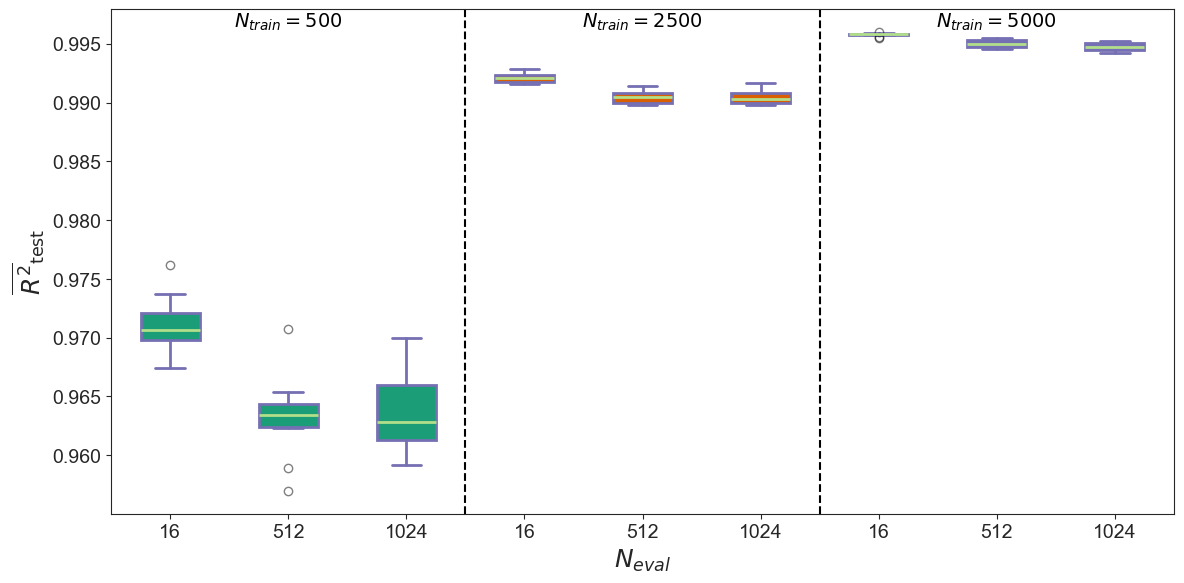

####################################################################################################


In [6]:
import matplotlib.pyplot as plt
import textwrap

# Prepare data for plotting
data_to_plot = []
ntrain_labels = []  # List to store the ntrain values corresponding to each set of boxplots

for ntrain in ntrain_values:
    for neval in neval_values:
        R2score_list = df.loc[(df['ntrain'] == ntrain) & (df['neval'] == neval), 'R2 score'].values[0]
        data_to_plot.append(R2score_list)
        ntrain_labels.append(ntrain)  # Collect the ntrain values

# Define colors to cycle through for each group of 3 plots
colors = ['#1b9e77', '#d95f02', '#7570b3']

# Create a figure instance
fig = plt.figure(figsize=(12, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True)

# Customize the boxplot appearance
for i, box in enumerate(bp['boxes']):
    # Determine the color for the current group of 3 plots
    color_index = (i // 3) % len(colors)
    color = colors[color_index]

    box.set(color='#7570b3', linewidth=2)
    box.set(facecolor=color)

for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

# Define the labels to repeat
labels = neval_values
num_labels = len(labels)
num_boxes = len(bp['boxes'])

# Generate repeated labels
repeated_labels = labels * (num_boxes // num_labels) + labels[:num_boxes % num_labels]

# Set x-axis labels
ax.set_xticklabels(repeated_labels)

# Add vertical black lines after every 3 boxplots
for i in range(3, num_boxes, 3):
    ax.axvline(x=i + 0.5, color='black', linestyle='--', linewidth=1.5)

# Set a fixed y-position for the sub-headings
fixed_y_position = max(max(d) for d in data_to_plot) * 1.0  # 10% above the maximum value across all plots

# Add sub-headings (annotations) for every group of 3 boxplots
for i in range(0, num_boxes, 3):
    x_position = i + 2.0  # Position the subheading in the center of the group
    ntrain_value = ntrain_labels[i]  # Get the ntrain value for the current group
    ax.text(x_position, fixed_y_position, f'$N_{{train}} = {ntrain_value}$', ha='center', va='bottom', fontsize=14, color='black')

# Set labels and title
# plt.xlabel('\n'.join(textwrap.wrap('# of random points at which output field is evaluated for a given input field sample during training ($N_{{eval}}$)', width=60)), fontsize=18)
plt.xlabel('$N_{{eval}}$', fontsize=18)
plt.ylabel(r'$\overline{R^2}_{\text{test}}$', fontsize=18) # Mean R2 score Test
# plt.yscale("log")
# plt.title(f'--', fontsize=12)  # Uncomment and edit if you have a title

# Remove top and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Increase the font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=14) 

plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), "figures", "R2_score.pdf"))

# Show the plot
plt.show()

print('#' * 100)
